#Regularización Lasso y Ridge

Las *estrategias de regularización* incorporan penalizaciones en el ajuste por mínimos cuadrados ordinarios (OLS) con la intención de minimizar la influencia de los predictores menos relevantes o para evitar overfitting. Por lo general, aplicando regularización se consigue modelos con mayor poder predictivo.


En este caso, se va a hacer una comparación entre el modelo de mínimos cuadrados ordinarios (OLS) respecto al modelo de Lasso y el modelo de Ridge (modelos de regularización), los cuales se explicarán más adelante.

En un primer momento, cargamos y analizamos los datos:

##Librerías

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##Datos

In [ ]:
#Cargar el dataset
from google.colab import files
uploaded = files.upload()
ccaa = 'desigualdad_ccaa.xlsx'
data = pd.read_excel(ccaa, sheet_name='Datos', header = 0)

print (data.head(6))

Saving desigualdad_ccaa.xlsx to desigualdad_ccaa.xlsx
                          CCAA  PIBpc  Rmedper  ...  Empint  Empweb  Empsoc
0                    Andalucía  19633     9160  ...    98.2    71.5    54.3
1                       Aragón  28727    12300  ...    98.3    85.4    64.7
2      Asturias, Principado de  23299    12523  ...    98.1    81.6    61.3
3               Balears, Illes  28213    12410  ...    97.6    81.4    73.0
4                     Canarias  21244     9487  ...    97.8    67.8    62.8
5                    Cantabria  24383    12205  ...    98.6    72.7    65.9

[6 rows x 50 columns]


En este caso vamos a estudiar si la Tasa de Riesgo de Pobreza (Riespob) viene explicadao por:


*   Salario medio anual (Salmed).
*   Porcentaje de población analfabeta (Analf).
* Porcentaje de personas que valoran su estado de salud como malo o muy malo (Salmal).
* Porcentaje de ocupados a tiempo completo (Ocuptc).






In [ ]:
#Nos quedamos con los datos que queremos
datos = data[['Salmed', 'Analf', 'Salmal', 'Ocuptc', 'Riespob']]
#Los dividimos entre los que serán las variables explicativas y explicadas
X = datos.drop('Riespob', axis=1)
y = datos['Riespob']

In [ ]:
#Visualizamos que se han seleccionado los datos correctamente
datos.head()

,Salmed,Analf,Salmal,Ocuptc,Riespob
0,21805.92,2.6,7.75,84.6,31.3
1,23531.83,0.7,6.54,86.2,17.9
2,23914.61,0.5,6.53,86.1,20.7
3,22800.87,1.5,4.99,87.3,12.0
4,20763.48,1.6,7.55,87.1,28.5


##Visualización correlación entre variables

Se procede en un principio a estudiar de manera sencilla la correlación entre variables. La correlación varía entre el 1 y -1 (por lo tanto, puede ser positiva o negativa), siendo 0 cuando no hay correlación.
Este primer paso es útil debido a que nos permite observar:


1.   Cuales podrían ser buenos predictores del modelo (correlación alta entre la variable dependiente y las independientes).
2.   Estidar la colinealidad entre las variables independientes.



In [ ]:
#Creación de la matriz de correlación
corr_matr = datos.corr()
display(corr_matr)

,Salmed,Analf,Salmal,Ocuptc,Riespob
Salmed,1.000000,-0.594097,0.148903,-0.195036,-0.729540
Analf,-0.594097,1.000000,-0.367409,-0.017558,0.782829
Salmal,0.148903,-0.367409,1.000000,-0.065431,-0.153341
Ocuptc,-0.195036,-0.017558,-0.065431,1.000000,0.138214
Riespob,-0.729540,0.782829,-0.153341,0.138214,1.000000


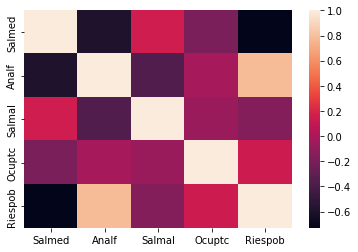

In [ ]:
# Heatmap matriz de correlaciones

heat_map = sns.heatmap(corr_matr)
heat_map;

Como vemos aquí, tanto a través de la matriz de correlación como con el heatmap, la variable dependiente (Riesgo de Pobreza) tiene una correlación alta con Salario medio y Analfabetos. Si bien, entre estas dos variables independientes también se puede considerar que hay correlación alta.

Ahora se procede a realizar cada uno de los 3 modelos. Veremos así, si los modelos de regularización "mejoran" o no, para este caso, el modelo obtenido a partir de Mínimos Cuadrados Ordinarios.

##Mínimos Cuadrados Ordinarios

El método de los mínimos cuadrados se utiliza para calcular la recta de regresión lineal que minimiza los residuos, esto es, las diferencias entre los valores reales y los estimados por la recta. (https://anestesiar.org/2020/la-distancia-mas-corta-el-metodo-de-los-minimos-cuadrados/)

In [ ]:
from sklearn.linear_model import LinearRegression

reg_lin =LinearRegression()
reg_lin = reg_lin.fit(X,y) # ajuste del modelo

#Cálculo de los coeficientes
b0_m=round(reg_lin.intercept_,2) 
b1_m=round(reg_lin.coef_[0],4) 
b2_m=round(reg_lin.coef_[1],2) 
b3_m=round(reg_lin.coef_[2],2)
b4_m=round(reg_lin.coef_[3],2)
r2_m=round(reg_lin.score(X, y),2) 

##Modelo Lasso

La **regularización Lasso** penaliza la suma del valor absolutos de los coeficientes de regresión. A esta penalización se le conoce como l1 y tiene el efecto de forzar a que los coeficientes de los predictores tiendan a cero. Dado que un predictor con coeficiente de regresión cero no influye en el modelo, lasso consigue excluir los predictores menos relevantes. (https://www.cienciadedatos.net/documentos/py14-ridge-lasso-elastic-net-python.html)

In [ ]:
# Creación del modelo
from sklearn.linear_model import LassoCV
reg_lasso = LassoCV(
            alphas          = np.logspace(-10, 3, 200),
            normalize       = True,
            cv              = 10
         )
reg_lasso = reg_lasso.fit(X,y)

#Cálculo de los coeficientes
b0_l=round(reg_lasso.intercept_,2)
b1_l=round(reg_lasso.coef_[0],4)
b2_l=round(reg_lasso.coef_[1],2) 
b3_l=round(reg_lasso.coef_[2],2)
b4_l=round(reg_lasso.coef_[3],2)
r2_l=round(reg_lasso.score(X, y),2)

#Ridge

La **regularización Ridge** penaliza la suma de los coeficientes elevados al cuadrado. A esta penalización se le conoce como l2 y tiene el efecto de reducir de forma proporcional el valor de todos los coeficientes del modelo pero sin que estos lleguen a cero. (https://www.cienciadedatos.net/documentos/py14-ridge-lasso-elastic-net-python.html)

In [ ]:
from sklearn.linear_model import RidgeCV

reg_ridge  = RidgeCV(
            alphas          = np.logspace(-10, 2, 200),
            fit_intercept   = True,
            normalize       = True,
            store_cv_values = True
         )
reg_ridge = reg_ridge.fit(X,y)

#Cálculo de los coeficientes
b0_r=round(reg_ridge.intercept_,2) 
b1_r=round(reg_ridge.coef_[0],4) 
b2_r=round(reg_ridge.coef_[1],2) 
b3_r=round(reg_ridge.coef_[2],2)
b4_r=round(reg_ridge.coef_[3],2)
r2_r=round(reg_ridge.score(X, y),2) 

Error cuadrático medio

In [ ]:
#Valores originales
Y_true = y

#predicciones regresión lineal
Y_pred_m = reg_lin.predict(X)
Y_pred_m = Y_pred_m.flatten()

#predicciones regresión lasso
Y_pred_l = reg_lasso.predict(X)
Y_pred_l = Y_pred_l.flatten()

#predicciones regresión ridge
Y_pred_r = reg_ridge.predict(X)
Y_pred_r = Y_pred_r.flatten()

Vemos que cada predicción toma unos valores diferentes

In [ ]:
print('* Predicción_MSO:',Y_pred_m ,'\n*', 'Predicción_Lasso:', Y_pred_l, '\n*', 'Predicción_Ridge:', Y_pred_r)

* Predicción_MSO: [27.48434334 16.13949202 14.64767286 20.30115606 25.09523013 16.62757519
 17.48234201 24.32651202 17.62157316 20.51816666 29.79067285 21.43903578
 11.58622853 30.95490971 11.90257463  7.57420721 15.10830785] 
* Predicción_Lasso: [25.5051536  16.69103464 15.54315657 20.40690563 23.00098286 16.30221893
 18.32957902 23.73689338 17.03084012 20.78636021 30.09001797 19.55768226
 12.51924698 28.37980574 13.2263829  10.55701557 16.93672363] 
* Predicción_Ridge: [25.76770518 16.86741298 15.62957215 20.60205735 24.18303628 16.93705717
 18.19107372 23.75002681 17.26259089 20.45459613 28.91198045 20.64819211
 12.60001022 28.70940422 12.59542619  9.16094778 16.32891036]


In [ ]:
from sklearn.metrics import mean_squared_error

# Cálculo del Mean Squared Error (MSE)
mse_m = mean_squared_error(Y_true,Y_pred_m)
mse_l = mean_squared_error(Y_true,Y_pred_l)
mse_r = mean_squared_error(Y_true,Y_pred_r)

Ponemos la información de los coeficientes obtenidos para cada modelo en una misma tabla para así ser capaces de analizar y comparar los resultados.

In [ ]:
#import tabulate as tabulate
from tabulate import tabulate

In [ ]:
table = [['','','MCO', 'Lasso', 'Ridge'], ['','b0', b0_m, b0_l, b0_r], ['(salmed)','b1', b1_m, b1_l, b1_r], ['(analf)','b2', b2_m, b2_l, b2_r], ['(salamal)','b3', b3_m, b3_l, b3_r], 
         ['(Ocuptc)','b4', b4_m, b4_l, b4_r], ['','R2', r2_m, r2_l, r2_r], ['','MSE', mse_m, mse_l, mse_r]]

In [ ]:
print(tabulate(table, headers= 'firstrow', tablefmt='fancy_grid'))

╒═══════════╤═════╤══════════╤═════════╤═════════╕
│           │     │      MCO │   Lasso │   Ridge │
╞═══════════╪═════╪══════════╪═════════╪═════════╡
│           │ b0  │ -10      │ 39.89   │  4.36   │
├───────────┼─────┼──────────┼─────────┼─────────┤
│ (salmed)  │ b1  │  -0.0012 │ -0.0011 │ -0.0012 │
├───────────┼─────┼──────────┼─────────┼─────────┤
│ (analf)   │ b2  │   4.84   │  3.64   │  3.74   │
├───────────┼─────┼──────────┼─────────┼─────────┤
│ (salamal) │ b3  │   0.76   │  0      │  0.36   │
├───────────┼─────┼──────────┼─────────┼─────────┤
│ (Ocuptc)  │ b4  │   0.54   │  0      │  0.41   │
├───────────┼─────┼──────────┼─────────┼─────────┤
│           │ R2  │   0.74   │  0.7    │  0.72   │
├───────────┼─────┼──────────┼─────────┼─────────┤
│           │ MSE │  14.2587 │ 16.3844 │ 15.34   │
╘═══════════╧═════╧══════════╧═════════╧═════════╛


RESULTADO COMPARACIÓN DATOS: El modelo conseguido a través de MCO (OSL en inglés) aporta tanto un R2 mayor como un Error Menor que el resto, por lo que en un principio este sería el modelo que nos convendría más.
No obstante, si que vemos diferencias entre los 3 modelos, pues los de regularización otorgan relativamente menor peso a los predictores de lo que lo hace por MCO, llegando incluso el modelo de Lasso a descartar las variables Salmal y Ocuptc.